In [218]:
using MLDatasets
using LightGraphs, GraphPlot, Compose, PyPlot
train_x, train_y = MNIST.traindata();
ind = [find(train_y .== 6)[1:20] ; find(train_y .== 1)[1:20]];

In [439]:
x_o = reshape(train_x[:,:,ind], 28^2, 40)'; y = train_y[ind];
ind0 = find(sum(x_o.^2,1) .> 1);
x = x_o[:,ind0]/10;

In [216]:
function hier_clust(x; v0 = 1e-1, iter = 100)
    n,m = size(x);
    X = x + 1e-10 * randn(n,m);
    #S = randperm(n)[1:k];
    M = x + 1e-10 * randn(n,m);
    Q = zeros(n,n);
    for i = 1:iter
        # calculate squared distance
        d2 = reshape(sum((repeat(X,outer = [n,1]) - repeat(M,inner = [n,1])).^2,2),n,n);
        
        # update Q
        Q = exp.(-d2/v0); Q = Q./ sum(Q,2);
        R = Diagonal(1./sum(Q,1)[:]) * Q'; L = Q * R;
        
        # update X, M
        X = (eye(n) + L)\full(x);
        M = R * X;
    end
    return X, M, Q
end

hier_clust (generic function with 1 method)

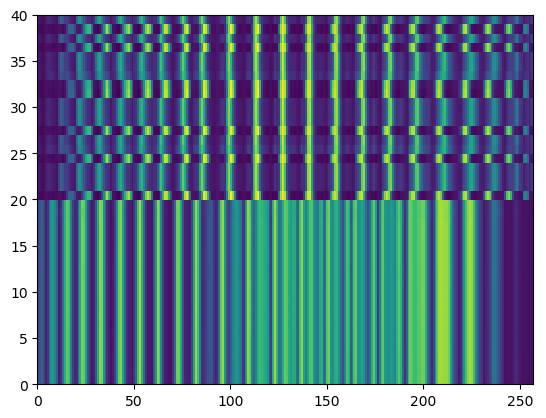

PyObject <matplotlib.collections.QuadMesh object at 0x151ac2c10>

In [446]:
out = hier_clust(x, v0 = 1e-1, iter = 50); pcolormesh(out[2])

In [445]:
out1 = hier_clust(x, v0 = 1e-1 * 1.2, iter = 50)
out2 = hier_clust(x, v0 = 1e-1/2, iter = 50)
out3 = hier_clust(x, v0 = 1e-1/3, iter = 50)

([0.0059526 0.0501068 … -2.21043e-5 -4.65377e-5; -0.00117783 -0.00128216 … -0.000226482 -0.000550055; … ; -5.70431e-5 -4.17488e-5 … -0.000179042 -0.000145617; -0.000237778 -0.000182343 … -0.00710396 -0.00711282], [0.00770298 0.043504 … -1.95383e-5 -3.60231e-5; -1.58729e-5 -0.000146962 … -0.000219785 -0.000329546; … ; 6.26756e-6 -7.30034e-6 … -3.05754e-6 -6.00866e-5; 0.000129312 7.99225e-5 … 0.00635856 0.00286886], [0.765216 0.000987821 … 0.000183086 0.000859461; 0.00151611 0.81106 … 0.000900493 0.0096643; … ; 0.000118746 0.000312594 … 0.583469 0.00359357; 0.000326368 0.00449816 … 0.00330822 0.372801])

In [132]:
function pair_diff(X)
    n = size(X,1);
    return reshape(sum((repeat(X,outer = [n,1]) - repeat(X,inner = [n,1])).^2,2),n,n);
end

pair_diff (generic function with 1 method)

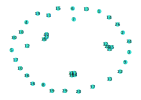

In [234]:
A = pair_diff(out[2]) .< 1e-2;
A1 = pair_diff(out1[2]) .< 1e-2;
A2 = pair_diff(out2[2]) .< 1e-2;
A3 = pair_diff(out3[2]) .< 1e-2;
gplot(Graph(A3), nodelabel = 1:40)

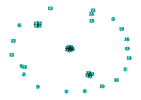

In [212]:
gplot(Graph(A2), nodelabel = 1:40)

In [244]:
c = connected_components(Graph(A))

3-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
 [21, 25, 28, 32, 33, 37, 39]                                           
 [22, 23, 24, 26, 27, 29, 30, 31, 34, 35, 36, 38, 40]                   

In [245]:
c1 = connected_components(Graph(A1))

3-element Array{Array{Int64,1},1}:
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
 [21, 25, 28, 32, 39]                                                   
 [22, 23, 24, 26, 27, 29, 30, 31, 33, 34, 35, 36, 37, 38, 40]           

In [246]:
c2 = connected_components(Graph(A2))

22-element Array{Array{Int64,1},1}:
 [1]                                 
 [2]                                 
 [3]                                 
 [4]                                 
 [5, 16]                             
 [6]                                 
 [7]                                 
 [8, 11, 15, 17, 18]                 
 [9]                                 
 [10]                                
 [12]                                
 [13]                                
 [14]                                
 [19]                                
 [20]                                
 [21, 25]                            
 [22]                                
 [23, 24, 27, 29, 31, 35, 36, 38, 40]
 [26]                                
 [28, 32, 34, 37, 39]                
 [30]                                
 [33]                                

In [247]:
c3 = connected_components(Graph(A3))

32-element Array{Array{Int64,1},1}:
 [1]             
 [2]             
 [3]             
 [4]             
 [5]             
 [6]             
 [7]             
 [8]             
 [9]             
 [10]            
 [11]            
 [12]            
 [13]            
 ⋮               
 [21, 25, 28, 32]
 [22]            
 [23, 24, 31, 35]
 [26]            
 [27, 38, 40]    
 [29]            
 [30]            
 [33]            
 [34]            
 [36]            
 [37]            
 [39]            

In [294]:
B = zeros(40,40);
g = Graph(B);
l = ones(40);
add_vertices!(g,m1);
for i = 1:m1
    t = length(c3[i])
    for j = 1:t
        add_edge!(g,c3[i][j],n+i);
    end
end
m2 = length(c2);
add_vertices!(g,m2);


In [282]:
function add_hierarchy(g,c1,c2,l)
    n = size(g,1); m1 = length(c1); m2 = length(c2);
    add_vertices!(g,m1+m2);
    for i = 1:m1
        t = length(c[i])
        for j = 1:t
            add_edge!(g,c[i][j],n+i);
        end
    end
    l = [l;maximum(l+1) * ones(m)];
    return g,l
end

add_hierarchy (generic function with 2 methods)

In [410]:
B = zeros(40,40);
g = Graph(B);
l = ones(40);
add_vertices!(g,4);
add_edge!(g,21,41); add_edge!(g,25,41);
add_edge!(g,28,42); add_edge!(g,32,42);
add_edge!(g,23,43); add_edge!(g,24,43); add_edge!(g,31,43); add_edge!(g,35,43);
add_edge!(g,27,44); add_edge!(g,38,44); add_edge!(g,40,44);

add_vertices!(g,4);
add_edge!(g,5,45); add_edge!(g,16,45);
add_edge!(g,8,46); add_edge!(g,11,46); add_edge!(g,15,46); add_edge!(g,17,46); add_edge!(g,18,46);
add_edge!(g,39,47); add_edge!(g,42,47);
add_edge!(g,29,48); add_edge!(g,36,48); add_edge!(g,43,48); add_edge!(g,44,48);

add_vertices!(g,4);
add_edge!(g,1,49); add_edge!(g,2,49); add_edge!(g,3,49); add_edge!(g,4,49); add_edge!(g,45,49); add_edge!(g,46,49);
add_edge!(g,6,49); add_edge!(g,7,49); add_edge!(g,9,49); add_edge!(g,10,49); add_edge!(g,12,49);
add_edge!(g,13,49); add_edge!(g,14,49); add_edge!(g,19,49); add_edge!(g,20,49);
add_edge!(g,41,50); add_edge!(g,47,50); add_edge!(g,33,51); add_edge!(g,37,51);
add_edge!(g,22,52); add_edge!(g,26,52); add_edge!(g,30,52); add_edge!(g,34,52); add_edge!(g,48,52);

add_vertices!(g,1);
add_edge!(g,50,53); add_edge!(g,51,53);

add_vertices!(g,1);
add_edge!(g,53,54); add_edge!(g,52,54);

add_vertices!(g,1);
add_edge!(g,54,55); add_edge!(g,49,55);

In [392]:
a = zeros(40);
a[1:40] = 1:40
a[5] = 1; a[1] = 5;
a[16] = 2; a[2] = 16
a[8] = 3; a[3] = 8;
a[11] = 4; a[4] = 11;
a[15] = 5; a[1] = 15;
a[17] = 6; a[6] = 17;
a[18] = 7; a[7] = 18;
a[25] = 22; a[22] = 25;
a[28] = 23; a[23] = 28;
a[32] = 24; a[24] = 32;
a[23] = 40; a[40] = 28;
a[24] = 39; a[39] = 32;
a[31] = 38; a[38] = 31;
a[35] = 37; a[37] = 35;
a[34] = 27; a[27] = 34;
a[38] = 35; a[37] = 31;
a[40] = 36; a[36] = 28;
a[36] = 33; a[33] = 28;
a[29] = 32; a[39] = 29;
a[39] = 25; a[22] = 29;
a[33] = 26; a[26] = 28;
a[37] = 27; a[34] = 31;

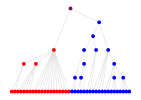

In [424]:
loc_x = [a;22;24;38;35;5;9;25;35;15;25;29;33;28;30.0;20.5]
cc = [repeat(["red"],inner = 20);repeat(["blue"],inner = 24);"red";"red";"blue";"blue";"red";"blue";
"blue";"blue";"blue";"blue";"purple"]
loc_y = [-repeat([1],inner = 40); -repeat([2],inner = 4); -repeat([3],inner = 4); -repeat([4],inner = 4); -5.0;-6;-7];
gplot(g, loc_x, loc_y, nodefillc = cc)

In [447]:
function plot_mnist(x; ind = 1)
    fig, ax = subplots(figsize=(5,3))
    y = zeros(28^2); y[ind0] = x[ind,:];
    p = reshape(y,28,28)';
    ax[:pcolormesh](p[end:-1:1,:],cmap = "PuBu");
    ax[:axis]("off");
end

plot_mnist (generic function with 1 method)

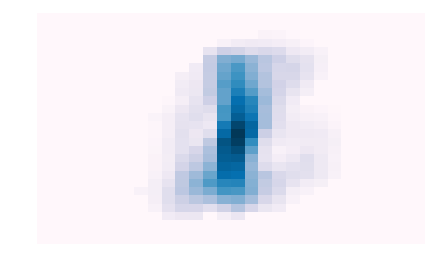

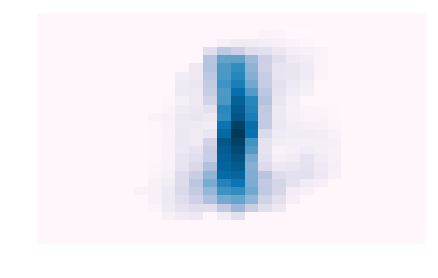

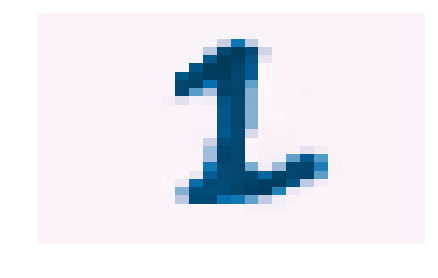

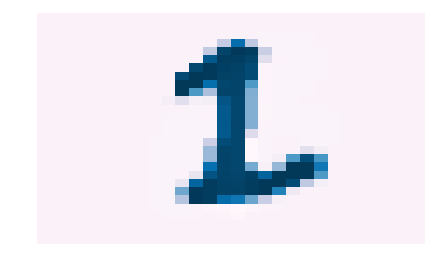

(0.0, 28.0, 0.0, 28.0)

In [465]:
i = 30
plot_mnist(out1[2],ind = i)
plot_mnist(out[2],ind = i)
plot_mnist(out2[2],ind = i)
plot_mnist(out3[2],ind = i)

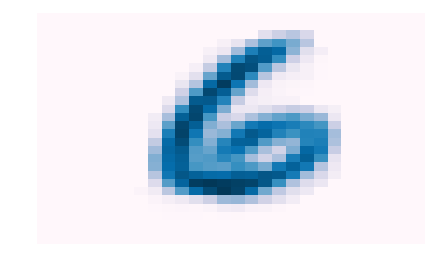

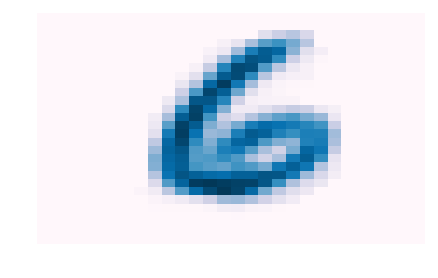

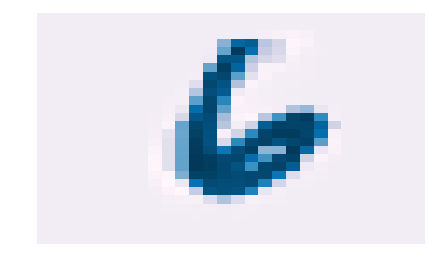

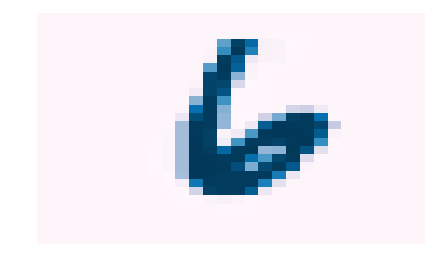

(0.0, 28.0, 0.0, 28.0)

In [469]:
i = 20
plot_mnist(out1[2],ind = i)
plot_mnist(out[2],ind = i)
plot_mnist(out2[2],ind = i)
plot_mnist(out3[2],ind = i)